In [8]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


## 1


In [9]:
#from ROOT import TFile, gROOT, TH1D, TLegend, THStack , TChain, TLorentzVector, gDirectory
#from tools import *
import math
import os
import time
import collections
import itertools
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
import mplhep as hep
import awkward as ak
import vector
vector.register_awkward()
import hist
import pylhe

# CMS experiment styles
hep.style.use("CMS")

In [13]:
events = ak.from_parquet("/home/matheusgeraldes/pasta1/pasta texte/HH_bbmumu.parquet")

In [14]:
print(events)

[{eventinfo: {nparticles: 8, ...}, particles: [...]}, {...}, ..., {...}, {...}]


In [15]:
# Define lepton , jets and vector boson containers
lep_collection = []
jet_collection = []
vbo_collection = []

start = time.time()

histos ={}
    
# Define histos
histos.update({
                   "hist_mu_pt"  : hist.Hist.new.Reg(150, 0,  150).Int64() ,
                   "hist_mu_eta" : hist.Hist.new.Reg(50, -5,    5).Int64() ,
                   "hist_mumu_deta" : hist.Hist.new.Reg(150,-5,    5).Int64() ,
                   "hist_mumu_mass" : hist.Hist.new.Reg(150, 0,  500).Int64() ,

                   "hist_b_pt"  : hist.Hist.new.Reg(150, 0,  150).Int64() ,
                   "hist_b_eta" : hist.Hist.new.Reg(50, -5,    5).Int64() ,
                   "hist_bb_deta" : hist.Hist.new.Reg(150,-5,    5).Int64() ,
                   "hist_bb_mass" : hist.Hist.new.Reg(150, 0,  500).Int64() ,

               })

    
    
# Get leptons and partons collections 
muons     = events.particles[ ( np.abs(events.particles.id) == 13 ) & ( events.particles.status == 1 ) ] 
bquarks   = events.particles[ ( np.abs(events.particles.id) == 5  ) & ( events.particles.status == 1 ) ] 
        

print(muons)


# Get muon variables
pmu = muons.vector 
pmumu = pmu[:,0] +pmu[:,1]
deta_mumu = np.abs( pmu.eta[:,0] - pmu.eta[:,1] )
           
# Get b quark variables
pb = bquarks.vector 
pbb = pb[:,0] + pb[:,1]
deta_bb = np.abs( pb.eta[:,0] - pb.eta[:,1] )
           
# Fill histos    
histos["hist_mu_pt"].fill(ak.flatten(pmu.pt))
histos["hist_mu_eta"].fill(ak.flatten(pmu.eta)) 
histos["hist_mumu_deta"].fill(deta_mumu)
histos["hist_mumu_mass"].fill(pmumu.m)

histos["hist_b_pt"].fill(ak.flatten(pb.pt))
histos["hist_b_eta"].fill(ak.flatten(pb.eta)) 
histos["hist_bb_deta"].fill(deta_bb)
histos["hist_bb_mass"].fill(pbb.m)

print(f"Time to run: {(time.time() - start)} seconds")

[[{vector: {x: 120, y: -59.2, ...}, id: -13, status: 1, ...}, {...}], ...]
Time to run: 0.2713642120361328 seconds


[Text(1, 0, 'Dimuons mass'), Text(0, 1, 'counts')]

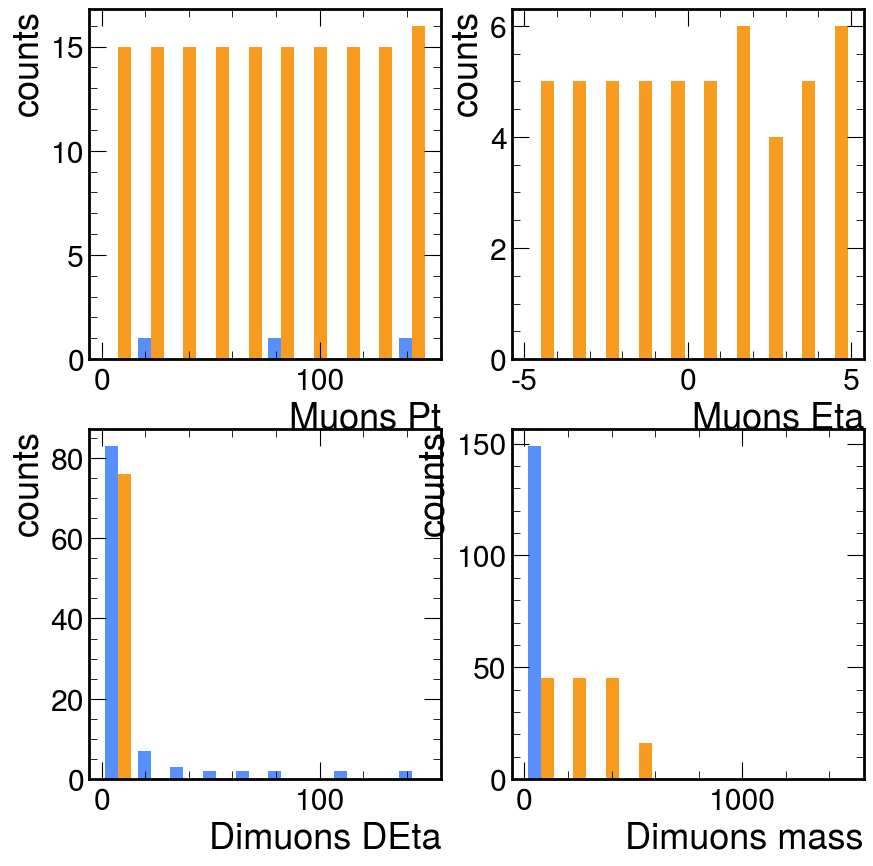

In [16]:
fig, ax = plt.subplots(2,2)
ax[0,0].hist( histos["hist_mu_pt"], bins=10, range=(0, 150) )
ax[0,0].set(xlabel='Muons Pt', ylabel='counts')
ax[0,1].hist( histos["hist_mu_eta"], bins=10, range=(-5, 5) )
ax[0,1].set(xlabel='Muons Eta', ylabel='counts')
ax[1,0].hist( histos["hist_mumu_deta"], bins=10, range=(0,150) )
ax[1,0].set(xlabel='Dimuons DEta', ylabel='counts')
ax[1,1].hist( histos["hist_mumu_mass"], bins=10, range=(0, 1500) )
ax[1,1].set(xlabel='Dimuons mass', ylabel='counts')

[Text(1, 0, 'b-quark pair mass'), Text(0, 1, 'counts')]

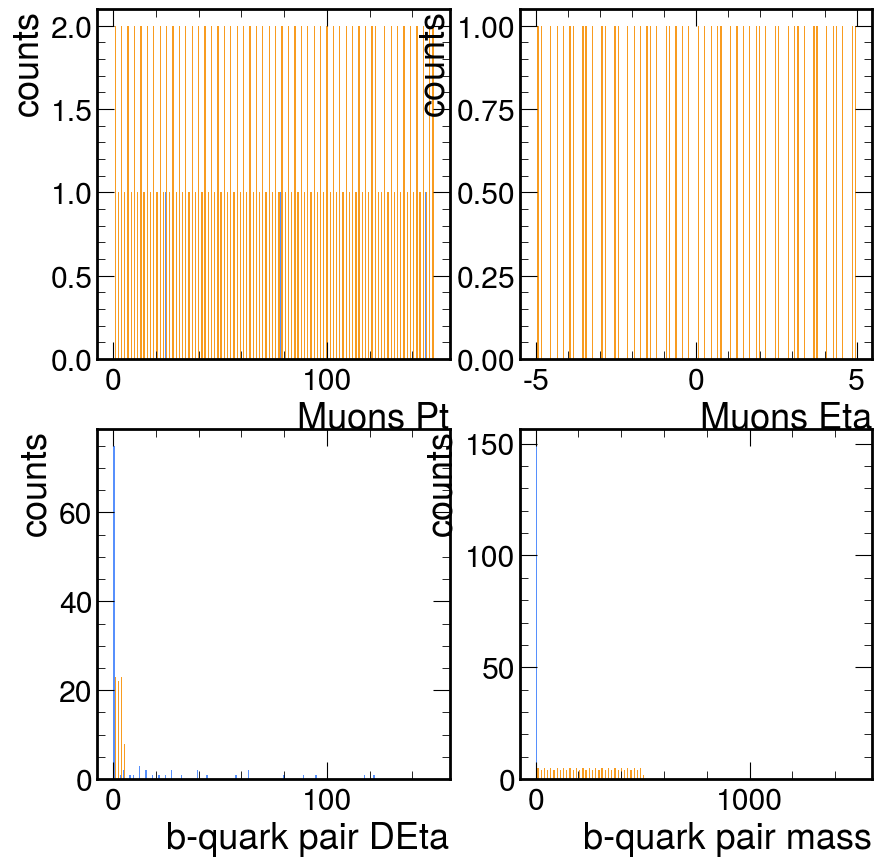

In [17]:
fig, ax = plt.subplots(2,2)
ax[0,0].hist( histos["hist_b_pt"], bins=100, range=(0, 150) )
ax[0,0].set(xlabel='Muons Pt', ylabel='counts')
ax[0,1].hist( histos["hist_b_eta"], bins=100, range=(-5, 5) )
ax[0,1].set(xlabel='Muons Eta', ylabel='counts')
ax[1,0].hist( histos["hist_bb_deta"], bins=100, range=(0,150) )
ax[1,0].set(xlabel='b-quark pair DEta', ylabel='counts')
ax[1,1].hist( histos["hist_mumu_mass"], bins=100, range=(0, 1500) )
ax[1,1].set(xlabel='b-quark pair mass', ylabel='counts')

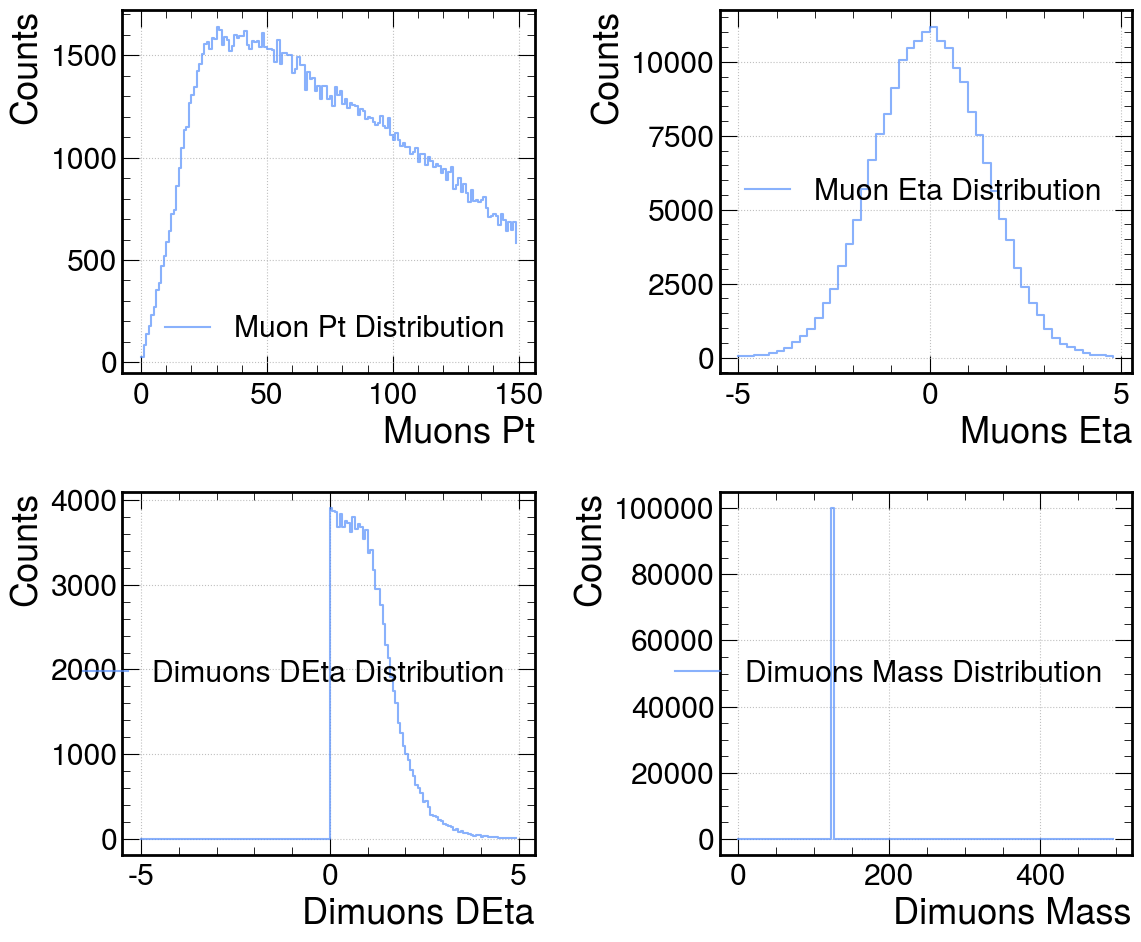

In [20]:
def plot_hist(ax, hist_obj, xlabel, ylabel, title):
    # Obter bins e valores usando hist
    edges = hist_obj.axes[0].edges  # Para acessar os edges
    values = hist_obj.values()  # Para acessar os valores do histograma

    # Plotar histograma
    ax.step(edges[:-1], values, where='post', alpha=0.7, label=title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    ax.grid(True)

fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Muons Pt
plot_hist(ax[0, 0], histos["hist_mu_pt"], 'Muons Pt', 'Counts', 'Muon Pt Distribution')

# Muons Eta
plot_hist(ax[0, 1], histos["hist_mu_eta"], 'Muons Eta', 'Counts', 'Muon Eta Distribution')

# Dimuons DEta
plot_hist(ax[1, 0], histos["hist_mumu_deta"], 'Dimuons DEta', 'Counts', 'Dimuons DEta Distribution')

# Dimuons Mass
plot_hist(ax[1, 1], histos["hist_mumu_mass"], 'Dimuons Mass', 'Counts', 'Dimuons Mass Distribution')

plt.tight_layout()
plt.show()

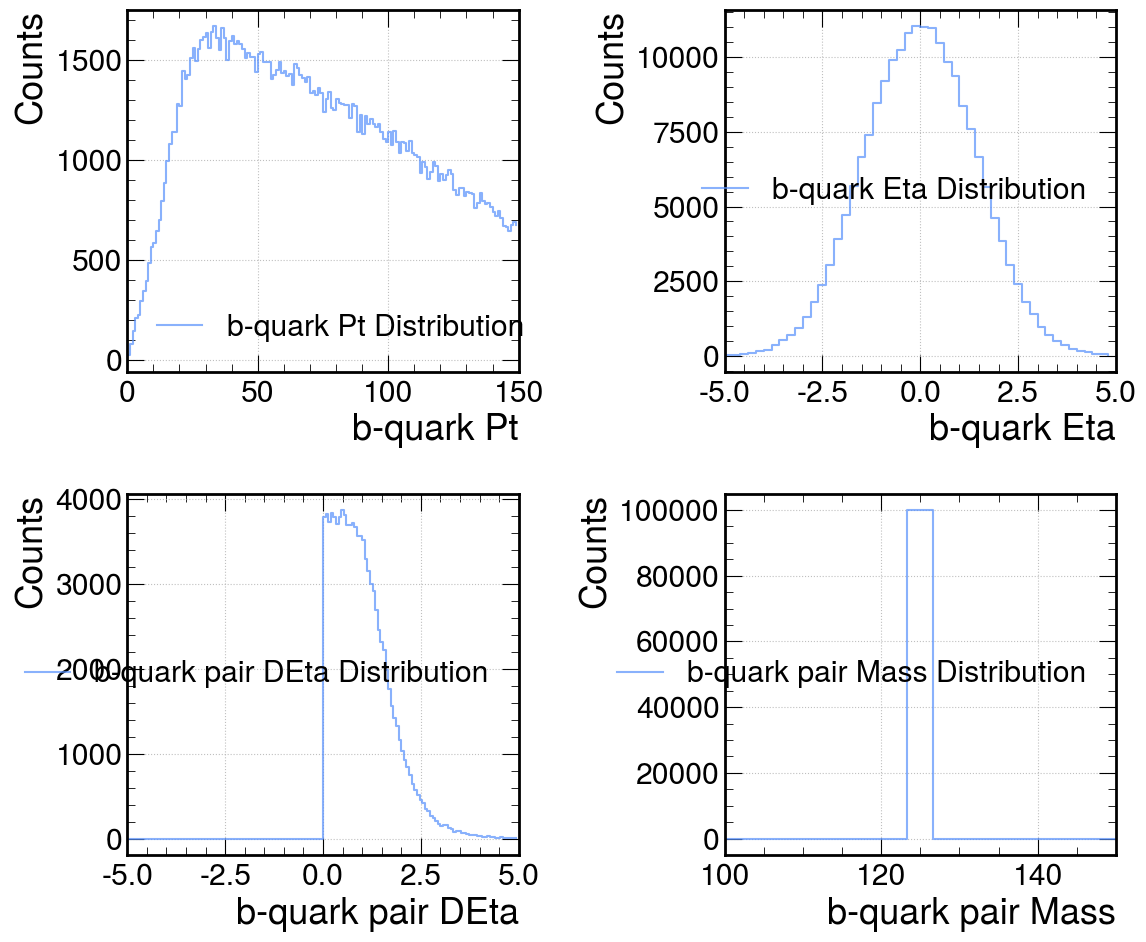

In [26]:
def plot_hist(ax, hist_obj, xlabel, ylabel, title, bin_range):
    # Obter os bins e valores do histograma
    edges = hist_obj.axes[0].edges
    values = hist_obj.values()

    # Plotar histograma usando o método step para representar histogramas
    ax.step(edges[:-1], values, where='post', alpha=0.7, label=title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xlim(bin_range)  # Definir o intervalo x
    ax.legend()
    ax.grid(True)

fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# b-quark Pt
plot_hist(ax[0, 0], histos["hist_b_pt"], 'b-quark Pt', 'Counts', 'b-quark Pt Distribution', (0, 150))

# b-quark Eta
plot_hist(ax[0, 1], histos["hist_b_eta"], 'b-quark Eta', 'Counts', 'b-quark Eta Distribution', (-5, 5))

# b-quark pair DEta
plot_hist(ax[1, 0], histos["hist_bb_deta"], 'b-quark pair DEta', 'Counts', 'b-quark pair DEta Distribution', (-5, 5))

# b-quark pair Mass com intervalo ajustado
plot_hist(ax[1, 1], histos["hist_bb_mass"], 'b-quark pair Mass', 'Counts', 'b-quark pair Mass Distribution', (100, 150))

plt.tight_layout()
plt.show()